   # Pyber Analysis


* Pyber's customers are primarily from the Urban city type. However, the average price for a ride is lower than the Suburban city type and especially lower than the Rural city type. This could be because rural and suburban riders usually travel farther distances than urban riders.


* Revenue from urban riders forms a signficant majority of Pyber's revenues (63%). Revenue from urban riders is twice the revenue of suburban riders (31%). Furthermore, the revenue from rural riders is dismall, forming 7% of total Pyber's total revenue. This is not surprising as 80% of Pyber's drivers are from the Urban city type. 


* Pyber should focus on increasing the number of drivers that serve suburban and rural riders. Increasing the number of drivers available to suburban and rural riders will increase the number of rides in these city types. The increase in rides will increase revenue from the suburban and the rural city types, which will increase Pyber's total revenue. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#File to Load (Remember to change these)
city_data_load = "data/city_data.csv"
ride_data_load = "data/ride_data.csv"

#Read City and Ride Data
city_data = pd.read_csv(city_data_load)
ride_data = pd.read_csv(ride_data_load)

#Combine data into one dataset
merged_data_df = pd.merge(ride_data,city_data,on = "city",how = "left")

# Display the data table 
merged_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

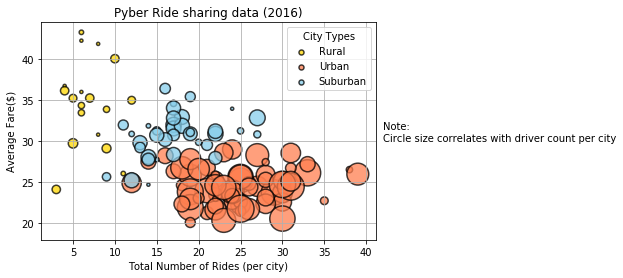

In [2]:
#Obtain x& y coordinates for each city type
#Use groupby on cities  
rs_data = merged_data_df.groupby("city")

#Calculate average fare ($), number of rides, number of drivers
rs_count = rs_data["ride_id"].count()
rs_avg_fare = rs_data["fare"].mean()
rs_driver_count = rs_data["driver_count"].mean()

#Set index to extraxt city type column
rs_city_type = city_data.set_index('city')['type']

#Build initial data frame 
rs_df = pd.DataFrame({"Total Rides":rs_count,"Average Fare":rs_avg_fare,"Total Drivers":rs_driver_count,
                      "City Type":rs_city_type})

#Build seperate dataframe for each city types 
rs_rural = rs_df.loc[rs_df['City Type'] == 'Rural']
rs_urban = rs_df.loc[rs_df['City Type'] =='Urban']
rs_suburban = rs_df.loc[rs_df['City Type']=='Suburban']


#Build scatter plots 
plt.scatter(rs_rural["Total Rides"], rs_rural["Average Fare"], color = "gold", edgecolors = "black", 
            s = rs_rural["Total Drivers"]* 10, alpha = 0.75, linewidth = 1.5)
plt.scatter(rs_urban["Total Rides"], rs_urban["Average Fare"], color = "coral", edgecolors = "black",
            s = rs_urban["Total Drivers"]*10, alpha = 0.75,linewidth = 1.5)
plt.scatter(rs_suburban["Total Rides"], rs_suburban["Average Fare"], color = "skyblue",edgecolors = "black",
            s = rs_suburban["Total Drivers"]* 10, alpha = 0.75, linewidth = 1.5)


#Incorporate the other graph properties
type_labels = ["Rural","Urban","Suburban",]
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride sharing data (2016)")

#Create a legend and add grid
legend = plt.legend(type_labels,title = "City Types",loc="upper right")
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]
plt.grid()

#Incorporate a text label regarding circle size
plt.text(42,30,"Note: \nCircle size correlates with driver count per city")

#Save Figure
plt.savefig("../Images/scatter.png")

#Show plot
plt.show()


## Total Fares by City Type

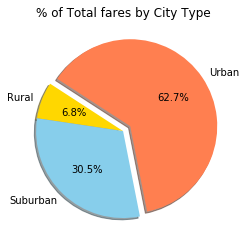

In [3]:
#Calculate type percents
#Do a groupby on count  
fares_data = merged_data_df.groupby("type")

#Calculate the total fares by city type 
fares_total = fares_data["fare"].sum()

#Build and format pie chart
fares_labels = ["Rural","Suburban","Urban"]
fares_colors = ["gold", "skyblue", "coral"]
fares_explosion = (0, 0, 0.1)
plt.pie(fares_total, labels = fares_labels, explode = fares_explosion, colors = fares_colors, autopct = "%1.1f%%", 
        shadow = True, startangle = 147)
plt.title("% of Total fares by City Type")

#Save figure
plt.savefig("../Images/fares_pie.png")

# Show figure
plt.show()

## Total Rides by City Type

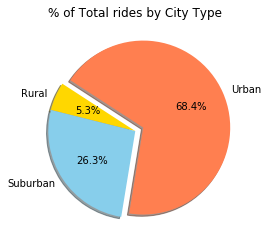

In [4]:
#Calculate Ride Percents
#Use groupby on type 
rides_data = merged_data_df.groupby("type")

#calculate total rides
rides_total = rides_data["ride_id"].count()

# Build and format pie chart
rides_labels = ["Rural","Suburban","Urban"]
rides_colors = ["gold", "skyblue", "coral"]
rides_explosion = (0, 0, 0.1)
plt.pie(rides_total, labels = rides_labels, explode = rides_explosion, colors =rides_colors, autopct="%1.1f%%", 
        shadow = True, startangle = 147)
plt.title("% of Total rides by City Type")

#Save figure
plt.savefig("../Images/rides_pie.png")

#Show figure
plt.show()


## Total Drivers by City Type

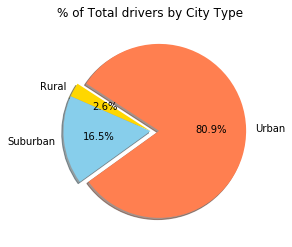

In [5]:
#Calculate driver percents
#Use groupby on city_data 
drivers_data = city_data.groupby("type")

#Calculate total driver count
drivers_total = drivers_data["driver_count"].sum()

#Build and format pie chart
drivers_labels = ["Rural","Suburban","Urban"]
drivers_colors = ["gold", "skyblue", "coral"]
drivers_explosion = (0, 0, 0.1)
plt.pie(drivers_total, labels = drivers_labels, explode = drivers_explosion, colors = drivers_colors, autopct = "%1.1f%%",
        shadow = True, startangle = 147)
plt.title("% of Total drivers by City Type")

#Save figure
plt.savefig("../Images/drivers_pie.png")

#Show Figure
plt.show()